# JAM FITTER
## before running this file, run in example02 directory
## jam3d -t 3 input.py
## then 
## cd mcdata
## mcproc .
## mcproc -c 0.01 .

In [1]:
import sys,os
from fitlab.resman import RESMAN
from fitlab.mcsamp import MCSAMP
from tools.config import load_config,conf
from tools.tools import load, save,checkdir
import pylab as py
import numpy as np
import pandas as pd
import copy
def lprint(msg):
    sys.stdout.write('\r')
    sys.stdout.write('%s' %msg)
    sys.stdout.flush()
%matplotlib inline

## dy parameters

In [2]:
dy = 2.5
# Inputs
summary_dy = './mcdata/summary.mcp'
config_dy = 'input.py'
# out
sid_dy = 'sidis_dy25.dat'
dat_thy_dy = 'data_and_thy_dy25.dat'
fig_seperation_dy = "separation_dy25.pdf"
fig_hermes_dy = "hermes_fit_dy25.pdf"


## setup path to store the results 

In [3]:
path2results='mcdata'
checkdir(path2results)

## data sets 

In [4]:
conf['datasets']={}

## SIDIS FUU 

In [5]:
conf['datasets']={}
conf['datasets']['sidis']={}

# The data sets to use are here:
conf['datasets']['sidis']['xlsx']={}
conf['datasets']['sidis']['xlsx'][1000]='sidis/expdata/1000.xlsx'  # |  proton   | pi+   | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1001]='sidis/expdata/1001.xlsx'  # |  proton   | pi-   | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1004]='sidis/expdata/1004.xlsx'  # |  deuteron | pi+   | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1005]='sidis/expdata/1005.xlsx'  # |  deuteron | pi-   | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1002]='sidis/expdata/1002.xlsx'  # |  proton   | k+    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1003]='sidis/expdata/1003.xlsx'  # |  proton   | k-    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1006]='sidis/expdata/1006.xlsx'  # |  deuteron | k+    | M_Hermes | hermes 
conf['datasets']['sidis']['xlsx'][1007]='sidis/expdata/1007.xlsx'  # |  deuteron | k-    | M_Hermes | hermes 

conf['datasets']['sidis']['norm']={}
for idx in conf['datasets']['sidis']['xlsx']: conf['datasets']['sidis']['norm'][idx]={'value':1,'fixed':True,'min':0,'max':1} 


conf['datasets']['sidis']['filters']={}
# The cuts you want to impose on the data are here:
for idx in conf['datasets']['sidis']['xlsx']: conf['datasets']['sidis']['filters'][idx]="z>0.2 and z<0.6 and Q2>1.69 and (pT/z)**2>0.25*Q2 and dy>2.5"


## parameters

In [6]:
conf['params']={}

### PDF parameters

In [7]:
conf['params']['pdf']={}
conf['params']['pdf']['widths1_uv']  ={'value':    4.58753e-01,'min': 0,'max':1,'fixed':False}
conf['params']['pdf']['widths2_uv']  ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}
conf['params']['pdf']['widths1_dv']  ={'value':    4.58753e-01,'min': 0,'max':1,'fixed':'widths1_uv'}
conf['params']['pdf']['widths2_dv']  ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':'widths2_uv'}
conf['params']['pdf']['widths1_sea'] ={'value':    5.37124e-01,'min': 0,'max':1,'fixed':False}
conf['params']['pdf']['widths2_sea'] ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}

In [8]:
conf['params']['ffpi']={}
conf['params']['ffpi']['widths1_fav']   ={'value':    1.35615e-01,'min': 0,'max':1,'fixed':False}
conf['params']['ffpi']['widths2_fav']   ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}
conf['params']['ffpi']['widths1_ufav'] ={'value':    1.56599e-01,'min': 0,'max':1,'fixed':False}
conf['params']['ffpi']['widths2_ufav'] ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}
conf['params']['ffk']={}
conf['params']['ffk']['widths1_fav']    ={'value':    1.35939e-01,'min': 0,'max':1,'fixed':False}
conf['params']['ffk']['widths2_fav']    ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}
conf['params']['ffk']['widths1_ufav']  ={'value':    1.73601e-01,'min': 0,'max':1,'fixed':False}
conf['params']['ffk']['widths2_ufav']  ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}
conf['params']['ffh']={}
conf['params']['ffh']['widths1_fav']    ={'value':    1.32925e-01,'min': 0,'max':1,'fixed':True}
conf['params']['ffh']['widths2_fav']    ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}
conf['params']['ffh']['widths1_ufav']  ={'value':    1.86073e-01,'min': 0,'max':1,'fixed':True}
conf['params']['ffh']['widths2_ufav']  ={'value':    0.00000e+00,'min':-1,'max':1,'fixed':True}

### combine multiple runs into one big run

In [9]:
runs=load(summary_dy)

In [10]:
load_config(config_dy)
conf['resman']=RESMAN(mode='solo',ip=None,nworkers=None)

loading sidis data sets 1007

### distribution of parameters

In [11]:
tab={}
tab['nll']=runs['all']['nll']
tab['weights']=runs['all']['weights']
samples=np.transpose(runs['all']['samples'])
for i in range(len(conf['parman'].order)):
   _,kind,par=conf['parman'].order[i]
   tab['%s-%s'%(kind,par)]=samples[i]
tab=pd.DataFrame(tab)

In [13]:
tab

,ffk-widths1_fav,ffk-widths1_ufav,ffpi-widths1_fav,ffpi-widths1_ufav,nll,pdf-widths1_sea,pdf-widths1_uv,weights
0,0.136289,0.175608,0.135968,0.156698,155.987675,0.538159,0.456147,6.217291e-23
1,0.136286,0.175632,0.135968,0.156699,155.987675,0.538137,0.456145,6.394927e-23
2,0.136290,0.175615,0.135968,0.156702,155.987675,0.538153,0.456145,6.577640e-23
3,0.136295,0.175613,0.135968,0.156702,155.987675,0.538136,0.456144,6.765572e-23
4,0.136287,0.175629,0.135969,0.156701,155.987675,0.538124,0.456142,6.958874e-23
5,0.136291,0.175581,0.135968,0.156700,155.987675,0.538142,0.456143,7.157699e-23
6,0.136291,0.175600,0.135969,0.156698,155.987675,0.538152,0.456137,7.362205e-23
7,0.136293,0.175597,0.135970,0.156700,155.987675,0.538137,0.456135,7.572554e-23
8,0.136287,0.175626,0.135967,0.156701,155.987675,0.538167,0.456144,7.788912e-23
9,0.136291,0.175615,0.135969,0.156701,155.987675,0.538155,0.456139,8.011453e-23


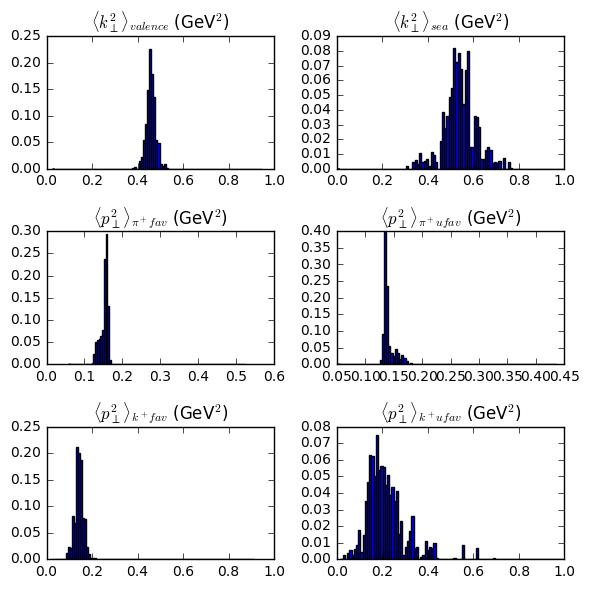

In [15]:
nrows,ncols=3,2
fig = py.figure(figsize=(ncols*3,nrows*2))


def title(par,particle):
    if par == 'widths1_uv':
        return r"$\langle k_\perp^2 \rangle_{valence}$ (GeV$^2$)"
    if par == 'widths1_sea':
        return r"$\langle k_\perp^2 \rangle_{sea}$ (GeV$^2$)"
    if par == 'widths1_fav':
        if particle=='pi':
            return r"$\langle p_\perp^2 \rangle_{\pi^+ fav}$ (GeV$^2$)"
        if particle=='k':
            return r"$\langle p_\perp^2 \rangle_{k^+ fav}$ (GeV$^2$)"
    if par == 'widths1_ufav':
        if particle=='pi':
            return r"$\langle p_\perp^2 \rangle_{\pi^+ ufav}$ (GeV$^2$)"
        if particle=='k':
            return r"$\langle p_\perp^2 \rangle_{k^+ ufav}$ (GeV$^2$)"
 


global cnt
cnt=0
def plot(tags):
   global cnt
   for i in range(len(tags)):
       cnt+=1
       if tags[i]==None: continue
       ax=py.subplot(nrows,ncols,cnt)
       kind,par=tags[i].split('-')
       if 'pdf' in kind:
        particle = 'p'
       elif 'ff' in kind:
        if 'pi' in kind:
            particle = 'pi'
        elif 'k' in kind:
            particle = 'k'

       if kind=='pdf':
           vmin=conf['params']['pdf'][par]['min']
           vmax=conf['params']['pdf'][par]['max']
           R=(vmin,vmax)
       elif kind=='ff' and particle=='pi':
           vmin=conf['params']['ffpi'][par]['min']
           vmax=conf['params']['ffpi'][par]['max']
           R=(vmin,vmax)
       elif kind=='ff' and particle=='k':
           vmin=conf['params']['ffk'][par]['min']
           vmax=conf['params']['ffk'][par]['max']
           R=(vmin,vmax)
       

       R=None
       #for k in runs:
       #    ax.hist(runs[k]['samples'].T[idx],weights=runs[k]['weights'],bins=50,normed=True,range=R)
       #ax.hist(tab[tags[i]],normed=True)
       #tabk=tab.query('nll<1300')
       ax.hist(tab[tags[i]],range=R,bins=100,weights=tab['weights'])
       #ax.set_title(par)
       ax.set_title(title(par,particle))

       
       #print samples.T[idx]
       #print weights
       #ax.hist(samples2.T[idx],weights=weights2,bins=50,color='r',histtype='step',normed=True,range=R)
       #ax.set_title(tags[i])
       #ax.set_xlim(vmin,vmax)
   py.tight_layout()


plot(['pdf-widths1_uv','pdf-widths1_sea'])
plot(['ffpi-widths1_fav','ffpi-widths1_ufav'])
plot(['ffk-widths1_fav','ffk-widths1_ufav'])



## data vs theory

In [16]:
data={'weights':runs['all']['weights']}
cnt=0
for s in runs['all']['samples']:
    cnt+=1    
    lprint('%d/%d'%(cnt,len(runs['all']['samples'])))  
    conf['resman'].get_residuals(s);
    for k in conf['resman'].sidisres.tabs:
        if k  not in data: data[k]=[]
        thy=conf['resman'].sidisres.tabs[k]['thy']    
        norm=conf['datasets']['sidis']['norm'][k]['value']
        shift=conf['resman'].sidisres.tabs[k]['shift']        
        data[k].append(shift+thy/norm)
save(data,'%s/%s'%(path2results, sid_dy))   

2292/2292

### compute averages and collect results

In [17]:
data=load('%s/%s'%(path2results, sid_dy))   
for k in data: data[k]=np.array(data[k])
thy,dthy={},{}
for k in data:
    if k=='weights': continue
    thy[k]=np.einsum('i,ik->k',data['weights'],data[k])
    dthy[k]=np.einsum('i,ik->k',data['weights'],(data[k]-thy[k])**2)**0.5
for k in thy: 
    conf['resman'].sidisres.tabs[k]['thy']=copy.copy(thy[k])
    conf['resman'].sidisres.tabs[k]['dthy']=copy.copy(dthy[k])

In [18]:
report=conf['resman'].gen_report(verb=0,level=1)
delimiters=[]
for i in range(len(report)): 
    if 'reaction:' in report[i]: delimiters.append(i) 

data={}
nlines=len(report)
for i in range(len(delimiters)):
    ini=delimiters[i]
    if i==len(delimiters)-1: fin=len(report)
    else: fin=delimiters[i+1]
    reaction=report[ini].replace('reaction:','').strip()
    data[reaction]={'raw data':report[ini:fin]}
    
for k in data:
    print k
    block=data[k]['raw data']
    isep=[i for i in range(len(block)) if '--------' in block[i]][0]
    data[k]['summary']=[block[i] for i in range(isep)]
    data[k]['tables']=[block[i] for i in range(isep+1,len(block))]

    tabs={}
    for l in data[k]['tables']:
        info=l.split(',')
        col=[s for s in info if 'col' in s][0].split('=')[1].strip()
        if col not in tabs: tabs[col]={}
        info=[[ss.strip() for ss in s.split('=')] for s in info if 'col' not in info  if s.strip()!='']
        
        for s in info:
            if s[0] not in tabs[col]: tabs[col][s[0]]=[]
        
        for s in info:
            try:
                value=float(s[1])
            except:
                value=s[1]
            tabs[col][s[0]].append(value)        

    data[k]['tabs']=tabs
save(data,'%s/%s'%(path2results, dat_thy_dy))  

sidis


In [19]:
def summary():
    for k in data:
        print ""
        for l in data[k]['summary']: print l
summary()


reaction: sidis
    idx        tar        had        col        obs  npts       chi2  chi2/npts      rchi2      nchi2
   1000     proton        pi+     hermes          M    38     148.09       3.90        0.00       0.00
   1001     proton        pi-     hermes          M    37      56.23       1.52        0.00       0.00
   1002     proton         k+     hermes          M    11       7.17       0.65        0.00       0.00
   1003     proton         k-     hermes          M    10       2.42       0.24        0.00       0.00
   1004   deuteron        pi+     hermes          M    39      81.77       2.10        0.00       0.00
   1005   deuteron        pi-     hermes          M    38      39.24       1.03        0.00       0.00
   1006   deuteron         k+     hermes          M    10      10.21       1.02        0.00       0.00
   1007   deuteron         k-     hermes          M    11       8.85       0.80        0.00       0.00


### distribution of parameters

0.458141891084 0.0204754960346


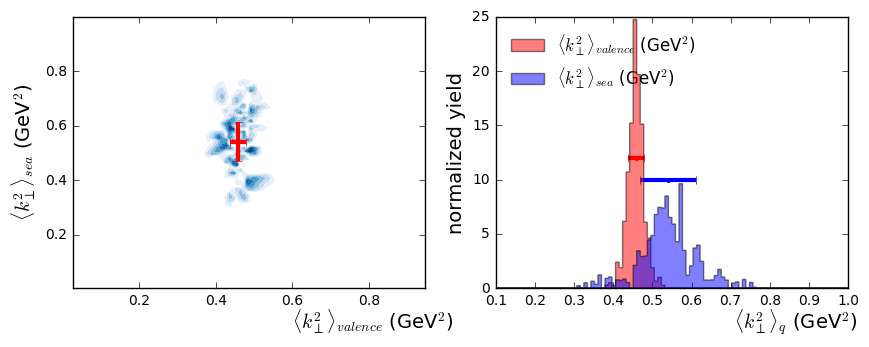

In [21]:
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
from matplotlib.mlab import griddata


nrows,ncols=1,2
py.figure(figsize=(ncols*5,nrows*3.5))

samples2=runs['all']['samples']
weights2=runs['all']['weights']

ax=py.subplot(121)

xgrid = np.linspace(np.amin(tab['pdf-widths1_uv']), np.amax(tab['pdf-widths1_uv']), 100)
ygrid = np.linspace(np.amin(tab['pdf-widths1_sea']), np.amax(tab['pdf-widths1_sea']), 100)
xgrid, ygrid = np.meshgrid(xgrid, ygrid)
zgrid = griddata(tab['pdf-widths1_uv'],tab['pdf-widths1_sea'],weights2, xgrid, ygrid,interp='linear')
zgrid/=np.amax(zgrid)
ax.contourf(xgrid, ygrid, zgrid,cmap=cm.Blues,levels=[0.15,0.3,0.45,0.6,0.75,0.9,1.05])

meanval=np.einsum('i,i',tab['pdf-widths1_uv'],weights2)
stdval=np.einsum('i,i',(tab['pdf-widths1_uv']-meanval)**2,weights2)**0.5

meansea=np.einsum('i,i',tab['pdf-widths1_sea'],weights2)
stdsea=np.einsum('i,i',(tab['pdf-widths1_sea']-meansea)**2,weights2)**0.5


ax.errorbar([meanval],[meansea],xerr=stdval,yerr=stdsea,fmt='r.',elinewidth=3,alpha=1.)
 
#ax.tick_params(axis='both', which='major', labelsize=18, direction='in')
ax.set_xlabel(r"$\langle k_\perp^2 \rangle_{valence}$ (GeV$^2$)",size=14)
ax.xaxis.set_label_coords(0.85, -0.07)
#ax.set_xlim(0.0,0.55)
#ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5])
#ax.set_xticklabels([r'$\boldsymbol{0}$','',r'$\boldsymbol{0.2}$','',r'$\boldsymbol{0.4}$',''])
ax.set_ylabel(r"$\langle k_\perp^2 \rangle_{sea}$ (GeV$^2$)",size=14)

##############################################
ax=py.subplot(122)

R=(0.1,1.)
bins=100

ax.hist(tab['pdf-widths1_uv'],histtype='stepfilled',range=R,weights=weights2,bins=bins,facecolor='r'\
   ,edgecolor='k'\
   ,label=r"$\langle k_\perp^2 \rangle_{valence}$ (GeV$^2$)",normed=True,alpha=0.5,zorder=10);

ax.hist(tab['pdf-widths1_sea'],histtype='stepfilled',range=R,weights=weights2,bins=bins,facecolor='b'\
   ,edgecolor='k'\
   ,label=r"$\langle k_\perp^2 \rangle_{sea}$ (GeV$^2$)",normed=True,alpha=0.5,zorder=10);


ax.errorbar([meansea],10,xerr=stdsea,yerr=0,fmt='b.',elinewidth=3,alpha=1.)

ax.errorbar([meanval],12,xerr=stdval,yerr=0,fmt='r.',elinewidth=3,alpha=1.)

meanfffav=np.einsum('i,i',tab['ffpi-widths1_fav'],weights2)
stdfffav=np.einsum('i,i',(tab['ffpi-widths1_fav']-meanfffav)**2,weights2)**0.5

meanffunfav=np.einsum('i,i',tab['ffpi-widths1_ufav'],weights2)
stdffunfav=np.einsum('i,i',(tab['ffpi-widths1_ufav']-meanffunfav)**2,weights2)**0.5

meanffkfav=np.einsum('i,i',tab['ffpi-widths1_fav'],weights2)
stdffkfav=np.einsum('i,i',(tab['ffpi-widths1_fav']-meanffkfav)**2,weights2)**0.5

meanffkunfav=np.einsum('i,i',tab['ffpi-widths1_ufav'],weights2)
stdffkunfav=np.einsum('i,i',(tab['ffpi-widths1_ufav']-meanffkunfav)**2,weights2)**0.5



descriptive_stat = [[float(meanval), stdval], [float(meansea), stdsea], [float(meanfffav),stdfffav],
                    [float(meanffunfav),stdffunfav], [float(meanffkfav),stdffkfav],
                    [float(meanffkunfav),stdffkunfav]]


print meanval, stdval

#ax.tick_params(axis='both', which='major', labelsize=18, direction='in')
ax.set_xlabel(r"$\langle k_\perp^2 \rangle_{q}$ (GeV$^2$)",size=14)
#ax.set_xlim([0,1.5])
#ax.set_xticks([0,0.25,0.5,0.75,1,1.25])
#ax.set_xticklabels([r'$\boldsymbol{0}$','',r'$\boldsymbol{0.5}$','',r'$\boldsymbol{1}$',''])
ax.xaxis.set_label_coords(0.85, -0.07)
ax.set_ylabel(r'normalized yield',size=14)
#ax.set_ylim([0,7.5])
#ax.set_yticks([0,2,4,6])
#ax.set_yticklabels([r'$\boldsymbol{0}$',r'$\boldsymbol{2}$',r'$\boldsymbol{4}$',r'$\boldsymbol{6}$'])
ax.legend(frameon=False,fontsize=12,loc=2)
#ax.text(0.87,0.87,r'$\boldsymbol{\rm (b)}$',size=20,transform=ax.transAxes,color='k',alpha=1)

#py.tight_layout()
py.savefig("%s/%s" % (path2results, fig_seperation_dy))



In [22]:
descriptive_stat

[[0.4581418910844113, 0.020475496034563018],
 [0.5404131934643089, 0.07137533555605656],
 [0.15180594382041368, 0.0098981141102067408],
 [0.14022455184393, 0.0097526007531058626],
 [0.15180594382041368, 0.0098981141102067408],
 [0.14022455184393, 0.0097526007531058626]]

### plot data and theory

In [23]:
from matplotlib import rc
rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"]})


data = pd.concat(pd.DataFrame(d)
                 for d in conf["resman"].sidisres.tabs.values())

data = data[(data["hadron"] == "pi+") &
            (data["target"] == "proton")]

In [24]:
#####################
# reading the data ##
#####################
#dat=pd.read_excel('E:/Laptop/School/Interships/Dr_Prokudin/Juniper82/PHYS296/dat/expdat/1000.xlsx');
#dat=pd.read_excel('C:/Users/Dolam/Documents/Scott/1000.xlsx');
dat=pd.read_excel('../../database/sidis/expdata/1000.xlsx');

In [25]:
######################
# Calculated values ##
######################
dat["delta"] = np.sqrt(dat["stat_u"]**2.0) # measurment error

data["delta"] = np.sqrt(data["stat_u"]**2.0) # measurment error

In [26]:
##################
## Binning data ##
##################
# data bin edeges

xBin=np.array([0.023,0.047,0.075,0.12,0.35,0.6]) # Bins for x used to plot Pt
Q2Bin=np.array([1.0,10]) # **NOTE** includes all Q2 data, therefore all value data is plotted vs. Pt
zBin= np.array([0.1, 0.2,0.25,0.3, 0.375, 0.475, 0.6, 0.8, 1.1]) # catagories for z to be ploted indiviualy in each subplot

# binning data
dat['xBin'] = pd.cut(dat['x'], xBin,labels = False, retbins=0)
dat['Q2Bin'] = pd.cut(dat['Q2'], Q2Bin,labels = False, retbins=0)
dat['zBin'] = pd.cut(dat['z'], zBin,labels = False, retbins=0)

data['xBin'] = pd.cut(data['x'], xBin,labels = False, retbins=0)
data['Q2Bin'] = pd.cut(data['Q2'], Q2Bin,labels = False, retbins=0)
data['zBin'] = pd.cut(data['z'], zBin,labels = False, retbins=0)

# bins for x and y that have non-empty intersection
pTdatmod=[0,1,2,3,4] # xBins that overlap Q2Bins
valuedatmod=[0] # Q2bins that overlap xBins

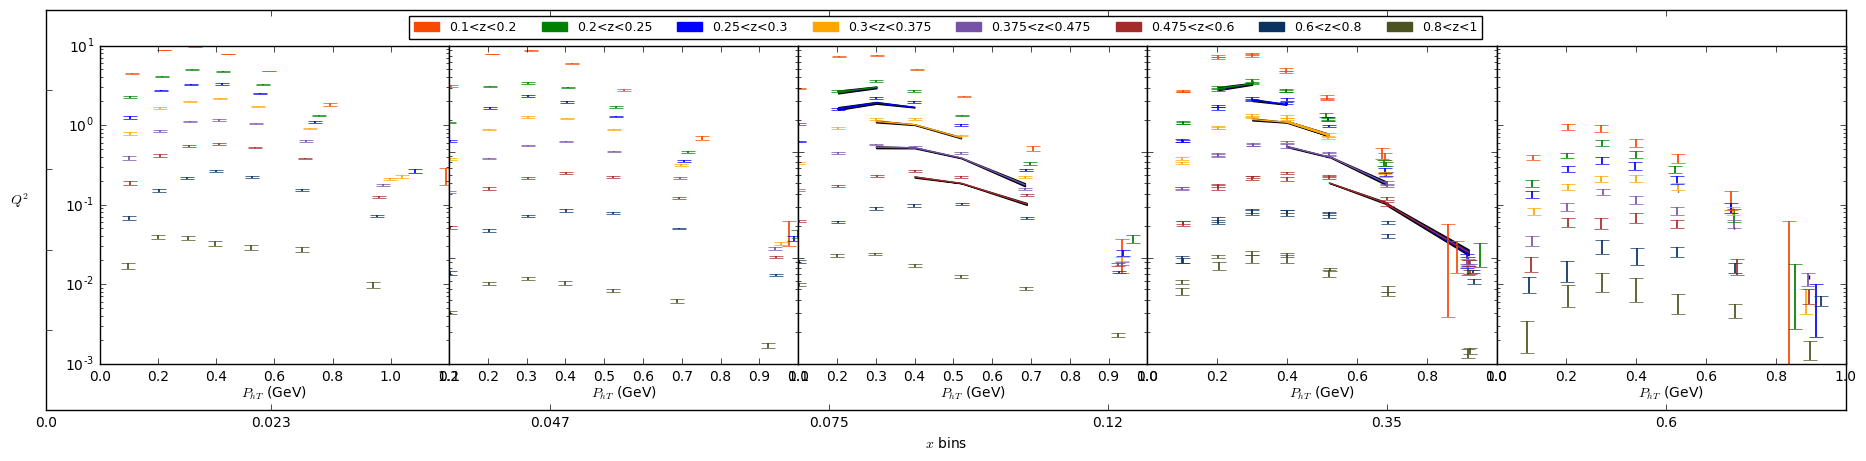

In [27]:
###############
# HermesPlot ##
###############  Reduced matix 
# initialize the figure
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib.backends.backend_pdf import PdfPages

fig1=plt.figure(figsize=(18, 4),facecolor="white") # figsize; wxh in inche
globalGrid=gridspec.GridSpec(1, 1,left=0.03,right=1,top=.91,bottom=.115, wspace=0.0, hspace=0.0) # plot for subplot matrix as 1x1 matrix
innerGrid=gridspec.GridSpecFromSubplotSpec(1,5 , subplot_spec=globalGrid[0], wspace=0.0, hspace=0.0) # 5x6 subplot grid 

# figure properties:
ax=fig1.add_axes([0,0,1,1]) # axas for subplot matrix as percent of hole
#ax.yaxis.set_ticks([0,1.25,2.76,4.27,5.78,7.29,8.8,10])
ax.xaxis.set_ticks([0,1.25,2.8,4.35,5.9,7.45,9,10 ])
xticklabels = np.array([0,0.023,0.047,0.075,0.12,0.35,0.6]) 

ax.set_yticklabels("")
ax.set_xticklabels(xticklabels)
ax.set_xlabel(r"$x$ bins") # xy-lables
ax.set_ylabel(r"$Q^2$",rotation="horizontal",labelpad = 15)
#ax.grid() # grid currently off

# subplot axis proerties (unused)
Zcolor=['#F74902',"green","blue",'orange',"#7851a9","brown",'#093162','#4b5320']
Zmark=["o","o","o","o"]

# Set legend
Zpatch1 = mpatches.Patch(color=Zcolor[0], label='0.1<z<0.2')
Zpatch2 = mpatches.Patch(color=Zcolor[1], label='0.2<z<0.25')
Zpatch3 = mpatches.Patch(color=Zcolor[2], label='0.25<z<0.3')
Zpatch4 = mpatches.Patch(color=Zcolor[3], label='0.3<z<0.375')
Zpatch5 = mpatches.Patch(color=Zcolor[4], label='0.375<z<0.475')
Zpatch6 = mpatches.Patch(color=Zcolor[5], label='0.475<z<0.6')
Zpatch7 = mpatches.Patch(color=Zcolor[6], label='0.6<z<0.8')
Zpatch8 = mpatches.Patch(color=Zcolor[7], label='0.8<z<1')
          
ax.legend(handles=[Zpatch1,Zpatch2,Zpatch3,Zpatch4,Zpatch5,Zpatch6,Zpatch7,Zpatch8],
          loc='upper center',
          ncol=8,prop={'size': 9}
          )
          
for f,F in zip(range(len(pTdatmod)),pTdatmod):       
    for j,J in zip(range(len(valuedatmod)),valuedatmod):
        
        k = int(f) # kth possition for subplot on innerGrid matrix
        maskX = dat['xBin'].isin([F]) # returns boolean for all Jth xBin in dat  
        maskY = dat['Q2Bin'].isin([J]) # returns boolean for all Fth Q2Bin in dat
        
        maskX_thr = data['xBin'].isin([F]) # returns boolean for all Jth xBin in dat  
        maskY_thr = data['Q2Bin'].isin([J]) # returns boolean for all Fth Q2Bin in dat
       
        ax = fig1.add_subplot(innerGrid[k]) # add subplot in innerGrid
        xydat = dat[maskX & maskY] # subset of data for Jth xBin and Fth Q2Bin
        
        xydata = data[maskX_thr & maskY_thr] # subset of data for Jth xBin and Fth Q2Bin
        
        for z in range(len(zBin)-1): 
            maskZ = xydat["zBin"].isin([z])
            databin = xydat[maskZ]
            
            maskZ_thr = xydata["zBin"].isin([z])
            databin_thr = xydata[maskZ_thr]
            
            if f != 0:
                ax.errorbar(databin['pT'],databin['value'],yerr=databin['delta'],capsize=5,linestyle="",color = Zcolor[z],elinewidth=1.25)
                ax.set_xlabel(r"$p_T$ (GeV)",labelpad=1)
                ax.set_yscale('log')
                ax.set_yticklabels('')
                
                ax.plot(databin_thr['pT'],databin_thr['thy'],linestyle="-",color = Zcolor[z]) # theory
                ax.fill_between(databin_thr['pT'],databin_thr['thy']-databin_thr['dthy'],databin_thr['thy']+databin_thr['dthy']) # theory error
                ax.set_xlabel(r"$P_{hT}$ (GeV)",labelpad=1)
                ax.set_yticklabels('')
               
            else:
                ax.errorbar(databin['pT'],databin['value'],yerr=databin['delta'],capsize=5,linestyle="", color = Zcolor[z],elinewidth=1.25)
                
                ax.plot(databin_thr['pT'],databin_thr['thy'],linestyle="-",color = Zcolor[z]) #theory
                ax.fill_between(databin_thr['pT'],databin_thr['thy']-databin_thr['dthy'],databin_thr['thy']+databin_thr['dthy']) # theory error

                
                ax.set_xlabel(r"$P_{hT}$ (GeV)",labelpad=1)
                ax.set_yscale('log')
plt.savefig("%s/%s" % (path2results, fig_hermes_dy))             